In [1]:
import numpy as np
import pandas as pd
from pandas.errors import EmptyDataError
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import brentq

file_path = f"./particle_energies/particle_dat1.csv"
energytime = pd.read_csv(file_path)

display(energytime)

,particle,time,energy,r,potential,impact parameter,v0
0,0,129439.862923,2.000000,1.975385e+15,-67200.000000,2.928607e+17,2.0
1,0,133066.288712,8.759437,1.950912e+15,-67540.993487,2.928607e+17,2.0
2,0,136794.313527,29.875451,1.926195e+15,-67854.980310,2.928607e+17,2.0
3,0,140626.783797,66.655442,1.901288e+15,-68138.241816,2.928607e+17,2.0
4,0,144566.625697,120.470815,1.876255e+15,-68386.849922,2.928607e+17,2.0
5,0,148616.847381,192.749808,1.851169e+15,-68596.705940,2.928607e+17,2.0
6,0,152780.541284,284.966765,1.826119e+15,-68763.598909,2.928607e+17,2.0
7,0,157060.886477,396.897862,1.801203e+15,-68885.880872,2.928607e+17,2.0
8,0,161461.151096,477.828728,1.776530e+15,-69037.775845,2.928607e+17,2.0
9,0,165984.694841,502.345300,1.752201e+15,-69255.868039,2.928607e+17,2.0


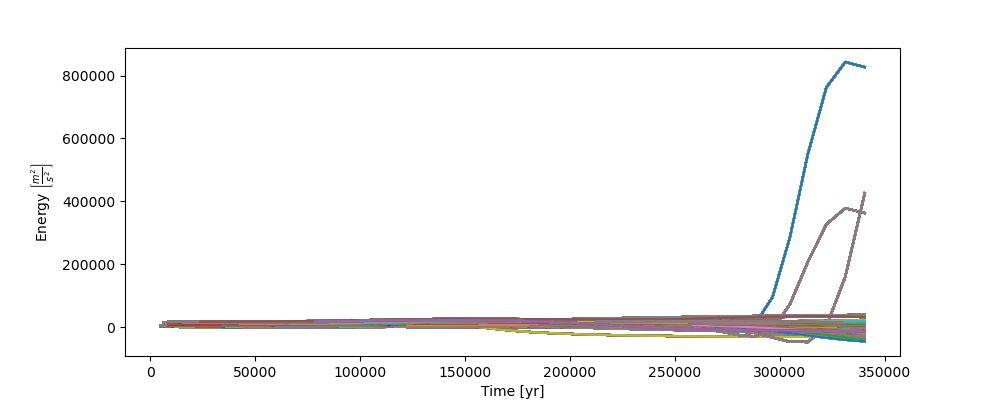

In [6]:
%matplotlib widget

fig, ax1 = plt.subplots(1, 1, figsize = (10, 4))

def plotenergies(index):
    file_path = f"./particle_energies/particle_dat{index}.csv"
    try:
        energytime = pd.read_csv(file_path)
    except EmptyDataError:
        return
        
    for particle in energytime['particle']:
        plt.plot(energytime['time'][energytime['particle'] == particle], energytime['energy'][energytime['particle'] == particle])

for i in range(1, 100):
    plotenergies(i)

plt.xlabel('Time [yr]')
plt.ylabel(r'Energy $\left[\frac{m^2}{s^2}\right]$')
plt.show()

1.9753848214285719
Particle 0, run 1 captured
Particle 1, run 1 captured
Particle 0, run 7 captured
Particle 1, run 7 captured
Particle 0, run 9 captured
Particle 1, run 9 captured
Particle 0, run 10 captured
Particle 1, run 10 captured
Particle 0, run 12 captured
Particle 0, run 18 captured
Particle 0, run 22 captured
Particle 0, run 23 captured
Particle 1, run 23 captured
Particle 0, run 24 captured
Particle 0, run 25 captured
Particle 0, run 26 captured
Particle 0, run 32 captured
Particle 1, run 33 captured
Particle 0, run 34 captured
Particle 0, run 41 captured
Particle 1, run 43 captured
Particle 0, run 46 captured
Particle 1, run 46 captured
Particle 2, run 46 captured
Particle 0, run 55 captured
Particle 0, run 56 captured
Particle 0, run 57 captured
Particle 1, run 57 captured
Particle 0, run 64 captured
Particle 0, run 71 captured
Particle 1, run 71 captured
Particle 0, run 76 captured
Particle 1, run 76 captured
Particle 2, run 76 captured
Particle 0, run 79 captured
Particl

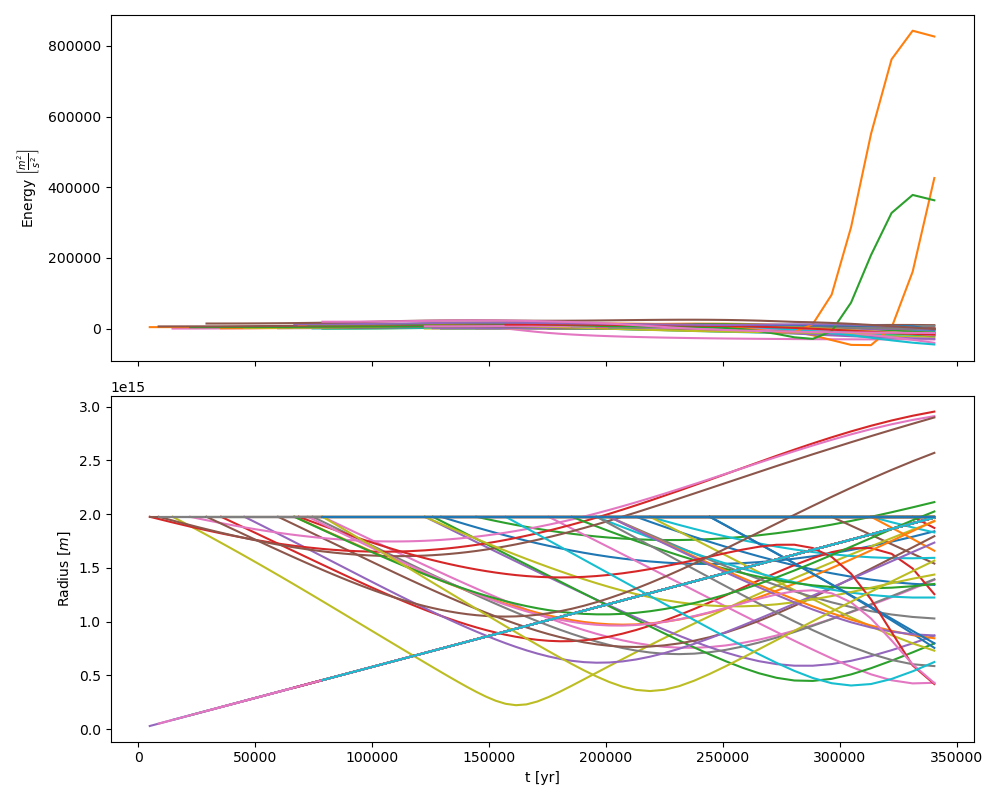

In [10]:
plt.clf()
script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
cs = np.sqrt(script_R*T)
M = 1.989*10.0**30 ## kg 
G = 6.674*10.0**(-11)  ## m^3*kg^-1*s^-2
a = 0.975471932310942752606143078377

rmax = (G*M)/(2*cs**2)
print(rmax*1e-15)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

def returncapture(index):
    file_path = f"./particle_energies/particle_dat{index}.csv"
    try:
        energytime = pd.read_csv(file_path)
    except EmptyDataError:
        return
    for particle in energytime['particle'].unique():
        if any(energytime['energy'][(energytime['particle'] == particle)] < 0):
            print(f"Particle {particle}, run {index} captured")
            t = np.array(energytime['time'][(energytime['particle'] == particle)])
            r0 = [cs*t[i]*3.154e7 for i in range(len(t))]
            ax1.plot(t, energytime['energy'][(energytime['particle'] == particle)])
            ax1.set_ylabel(r'Energy $\left[\frac{m^2}{s^2}\right]$')
            ax2.plot(t, energytime['r'][(energytime['particle'] == particle)])
            ax2.plot(t, r0, label = r"$r_0$")
            ax2.plot(t, [rmax for i in range(len(t))])
            ax2.set_ylabel(r'Radius $\left[m\right]$')
            plt.xlabel(r't [yr]')

for i in range(1, 100):
    returncapture(i)


#plt.legend()
plt.tight_layout()
plt.show()

1.9753848214285719
Particle 0, run 99 captured


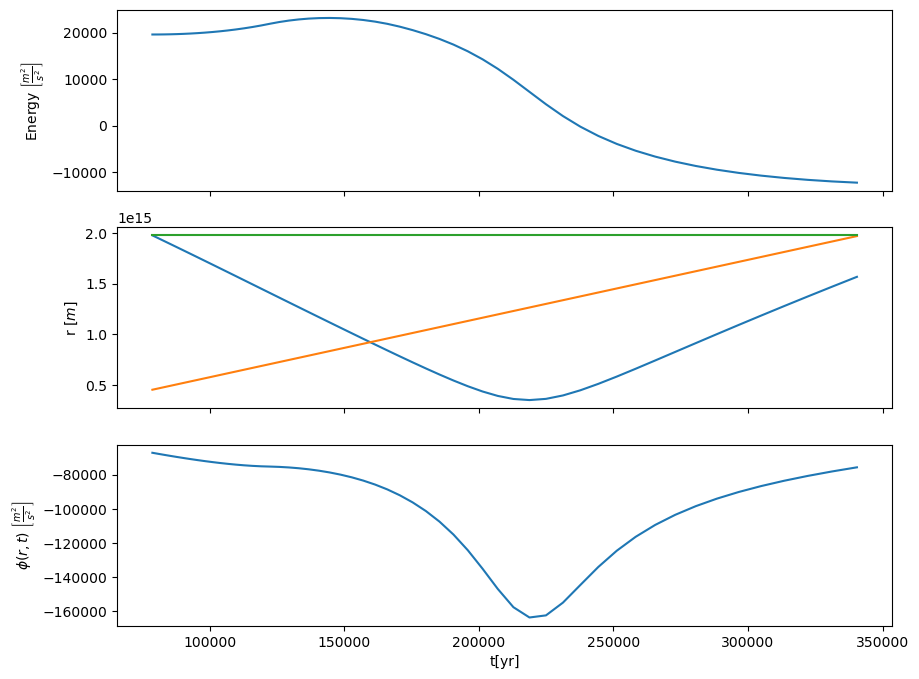

In [140]:
script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
cs = np.sqrt(script_R*T)
M = 1.989*10.0**30 ## kg 
G = 6.674*10.0**(-11)  ## m^3*kg^-1*s^-2
a = 0.975471932310942752606143078377

rmax = (G*M)/(2*cs**2)
print(rmax*1e-15)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

def returncapture(index):
    file_path = f"./particle_energies/particle_dat{index}.csv"
    try:
        energytime = pd.read_csv(file_path)
    except EmptyDataError:
        return
    for particle in energytime['particle'].unique():
        if any(energytime['energy'][(energytime['particle'] == particle)] < 0):
            print(f"Particle {particle}, run {index} captured")
            t = np.array(energytime['time'][(energytime['particle'] == particle)])
            r0 = [cs*t[i]*3.154e7 for i in range(len(t))]
            ax1.plot(t, energytime['energy'][(energytime['particle'] == particle)])
            ax1.set_ylabel(r'Energy $\left[\frac{m^2}{s^2}\right]$')
            ax2.plot(t, energytime['r'][(energytime['particle'] == particle)])
            ax2.plot(t, r0, label = r"$r_0$")
            ax2.plot(t, [rmax for i in range(len(t))])
            #ax2.set_yscale('log')
            ax2.set_ylabel(r'r $\left[m\right]$')
            ax3.plot(t, energytime['potential'][(energytime['particle'] == particle)])
            ax3.set_ylabel(r'$\phi(r, t) \ \left[\frac{m^2}{s^2}\right]$')
            def rfunc(index):
                file_path = f"./particle_energies/particle_dat{index}.csv"
                try:
                    energytime = pd.read_csv(file_path)
                except EmptyDataError:
                    return
                for particle in energytime['particle'].unique():
                    if any(energytime['energy'][(energytime['particle'] == particle)] < 0):
                        t = np.array(energytime['time'][(energytime['particle'] == particle)])
                        r = np.array(energytime['r'][(energytime['particle'] == particle)])
                        rfunc = scipy.interpolate.interp1d(t, r)
                        #print(scipy.optimize.brentq(lambda t: rfunc(t)-rmax, 201403.9780680049, 300000))
                        plt.plot(t, rfunc(t))
            #tturn = scipy.optimize.brentq(lambda t: rfunc(t)-rmax, 201403.9780680049, 300000)
            plt.xlabel('t[yr]')

returncapture(99)

plt.show()

In [89]:
import math 
import scipy

script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
c_s = math.sqrt(script_R*T)
M = 1.989*10.0**30 ## kg 
G = 6.674*10.0**(-11)  ## m^3*kg^-1*s^-2
a = 0.975471932310942752606143078377

def trapIntegrateLog(f, xmin, xmax, N):
    s = np.logspace(np.log10(xmin), np.log10(xmax), N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def trapIntegrateLinear(f, xmin, xmax, N):
    s = np.linspace(xmin, xmax, N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def loaddata(filename):
    with open(filename, "rb") as file:
        Nsteps = np.fromfile(file, dtype=np.int32, count=1)[0]

        xvec = np.fromfile(file, dtype=np.float64, count=Nsteps)
        alphavec = np.fromfile(file, dtype=np.float64, count=Nsteps)
        vvec = np.fromfile(file, dtype=np.float64, count=Nsteps)

    return xvec, alphavec, vvec

x4, alpha4, v4 = loaddata("/Users/richardanderson/workdir/planetesimal_project/ShuScripts/shusolution.bin")

alphaHelp = scipy.interpolate.interp1d(x4, alpha4)
vHelp = scipy.interpolate.interp1d(x4, v4)

def getAlpha(x):
    if x>1:
        return 2*x**(-2)
    else:
        return float(alphaHelp(x))

def getV(x):
    return float(vHelp(x))

def au_to_meters(au):
    au_in_meters = 1.49e11 # meters
    return au * au_in_meters
def meters_to_au(au):
    au_in_meters = 1.49e11 # meters
    return au / au_in_meters
def years_to_seconds(years):
    seconds = years * 3.15576e7
    return seconds
def seconds_to_years(seconds):
    years = seconds / 3.15576e7
    return years
def meters3toau3(cubic_meters):
    cubic_au_in_meters = (1.49e11)**3
    return cubic_meters / cubic_au_in_meters


#rmax = meters_to_au((G*M)/(2*c_s**2)) 


v_x = np.logspace(-6, 4, 10000)
'''
int01 = trapIntegrateLinear(lambda x: x**2*getAlpha(x), 1*10**(-12), 1, 10000)
v_integral = np.zeros(10000) 
for i in range(0, 10000): 
    if v_x[i] < 1: 
        v_integral[i] = trapIntegrateLinear(lambda x: x**2*getAlpha(x), 1*10**(-12), v_x[i], 10000)
    else: 
        v_integral[i] = int01 + trapIntegrateLog(lambda x: x**2*getAlpha(x), 1, v_x[i], 10000)
 
np.savetxt('vIntShu.txt', v_integral) 
'''

v_integral = np.loadtxt('/Users/richardanderson/workdir/planetesimal_project/ShuScripts/shuInt.txt')

IntHelper = scipy.interpolate.interp1d(v_x, v_integral, kind = 'cubic')

def get_x_integral(x):
    if x < 10.0**(-6):
        return 0
    if x > 2:
        return IntHelper(2) + 2*(x-2)
    return IntHelper(x)

def Mtot(r, t):
    r0 = c_s*t
    centralMass = .975502*c_s**2*r0/G
    Mcalc =  centralMass + r0**3/(G*t**2)*get_x_integral(r/r0)
    return min(Mcalc, M)

def getr_max(t):
    return scipy.optimize.brentq(lambda r: (Mp(t)+getMenc(r, t)-2*10**30), .4, 20000)

def getPhi(r, t):
    rmax = (G*M)/(2*c_s**2)
    phi_max = -G*M/rmax
    r_meters = r
    if r >= rmax:
        return -G*M/r_meters
    else:
        return phi_max - G*trapIntegrateLog(lambda rp: (Mtot(rp, t))/rp**2, r_meters, rmax, 10000)

def phidot(r, t):
    h = t*1e-4
    phi1 = getPhi(r, t+h)
    phi2 = getPhi(r, t-h)
    phidotresult = (phi1-phi2)/(2*h)
    return phidotresult


KeyError: 1

<Figure size 640x480 with 0 Axes>

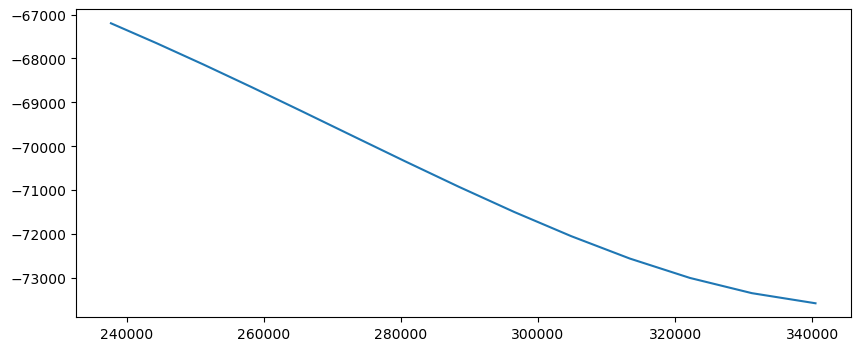

In [116]:
plt.clf()

fig, ax1 = plt.subplots(1, 1, figsize = (10, 4))

def plotpotential(index):
    file_path = f"./particle_energies/particle_dat{index}.csv"
    try:
        energytime = pd.read_csv(file_path)
    except EmptyDataError:
        return
    
    for particle in energytime['particle'].unique():
        t = energytime['time'][energytime['particle'] == particle]
        r = energytime['r'][energytime['particle'] == particle]
        potentialcluster = energytime['potential'][energytime['particle'] == particle]
        tsec = years_to_seconds(t)
        philocal = np.array([getPhi(r[i], tsec[i]) for i in range(1, len(r))])
        
        plt.plot(t, potentialcluster)

for index in range(1, 10):
    plotpotential(index)

#plt.xlabel('Time [yr]')
#plt.ylabel(r'Energy $\left[\frac{m^2}{s^2}\right]$')
plt.show()

[1.97538482e+15 1.95182318e+15 1.92890658e+15 1.90677268e+15
 1.88557252e+15 1.86547099e+15 1.84664716e+15 1.82929423e+15
 1.81361922e+15 1.79984221e+15 1.78819509e+15 1.77891968e+15
 1.77226538e+15 1.76848605e+15 1.76783643e+15 1.77056800e+15
 1.77692452e+15 1.78713743e+15 1.80142129e+15 1.81996963e+15
 1.84295140e+15 1.87061033e+15 1.90306161e+15 1.94019668e+15] [5.69078282e+12 5.85021748e+12 6.01411892e+12 6.18261227e+12
 6.35582618e+12 6.53389290e+12 6.71694839e+12 6.90513242e+12
 7.09858867e+12 7.29746484e+12 7.50191279e+12 7.71208862e+12
 7.92815279e+12 8.15027029e+12 8.37861069e+12 8.61334834e+12
 8.85466248e+12 9.10273734e+12 9.35776235e+12 9.61993221e+12
 9.88944709e+12 1.01665128e+13 1.04513408e+13 1.07441487e+13]
[0.0, -3.671557503641841e-11, -7.328646633964355e-11, -1.0944284143482375e-10, -1.4486981883545236e-10, -1.7920459971775122e-10, -2.1203473523850509e-10, -2.428980443017907e-10, -2.71284764470121e-10, -2.9664255032471126e-10, -3.183848998655915e-10, -3.3590346908754

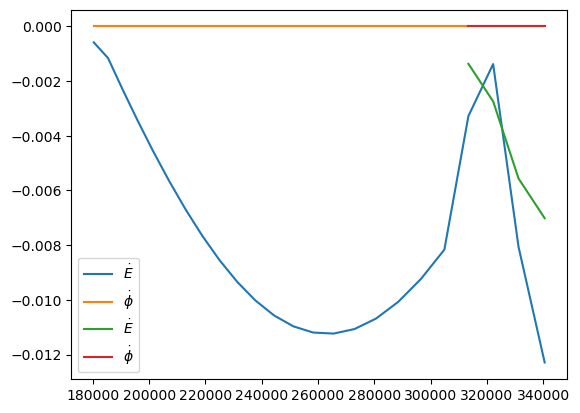

In [126]:
def plotphidot(index):
    file_path = f"./particle_energies/particle_dat{index}.csv"
    try:
        energytime = pd.read_csv(file_path)
    except EmptyDataError:
        return
    for particle in energytime['particle'].unique():
        if any(energytime['energy'][(energytime['particle'] == particle)] < 0):
            t = np.array(energytime['time'][(energytime['particle'] == particle)])
            r = np.array(energytime['r'][(energytime['particle'] == particle)])
            print(r, years_to_seconds(t))
            phi = energytime['potential'][(energytime['particle'] == particle)]
            e = energytime['energy'][(energytime['particle'] == particle)]
            phideriv = [phidot(r[i], years_to_seconds(t[i])) for i in range(len(t))]
            print(phideriv)
            edot = np.gradient(e, t)
            plt.plot(t, edot, label = r"$\dot{E}$")
            plt.plot(t, phideriv, label = r"$\dot{\phi}$")

plotphidot(1)
plt.legend()
plt.show()